In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [2]:
df_train=pd.read_csv("train.csv")

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

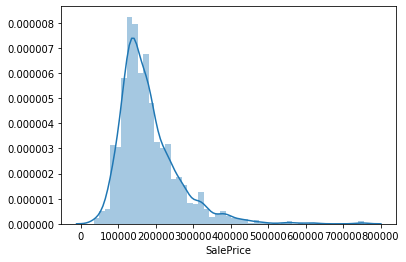

In [5]:
sns.distplot(df_train["SalePrice"])

In [6]:
print("Skewnewss:%f"%df_train["SalePrice"].skew())
print("Kurtosis:%f"%df_train["SalePrice"].kurt())

Skewnewss:1.882876
Kurtosis:6.536282


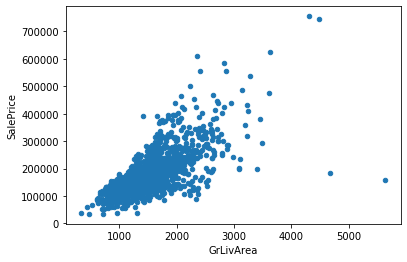

In [7]:
var="GrLivArea"
data=pd.concat([df_train["SalePrice"],df_train[var]],axis=1)
data.plot.scatter(x=var,y="SalePrice")

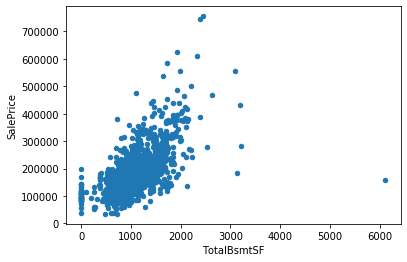

In [8]:
var="TotalBsmtSF"
data=pd.concat([df_train["SalePrice"],df_train[var]],axis=1)
data.plot.scatter(x=var,y="SalePrice")

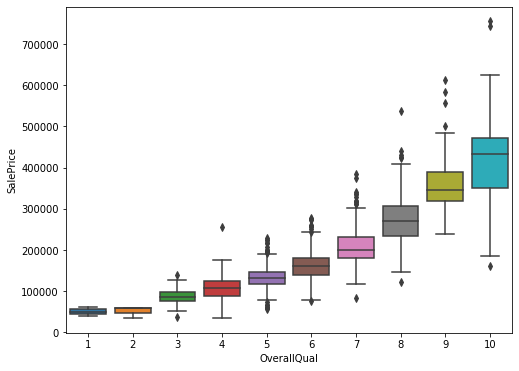

In [9]:
var="OverallQual"
data=pd.concat([df_train["SalePrice"],df_train[var]],axis=1)
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var,y="SalePrice",data=data)

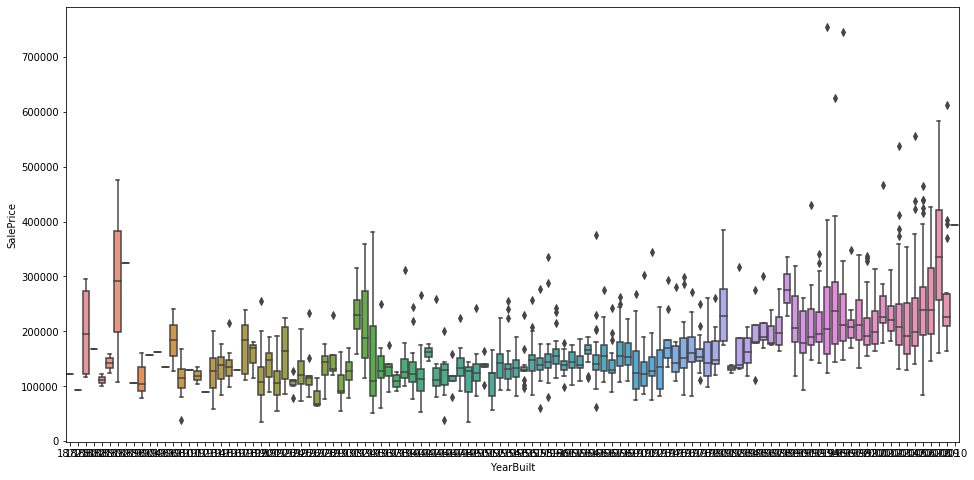

In [10]:
var="YearBuilt"
data=pd.concat([df_train["SalePrice"],df_train[var]],axis=1)
f,ax=plt.subplots(figsize=(16,8))
fig=sns.boxplot(x=var,y="SalePrice",data=data)

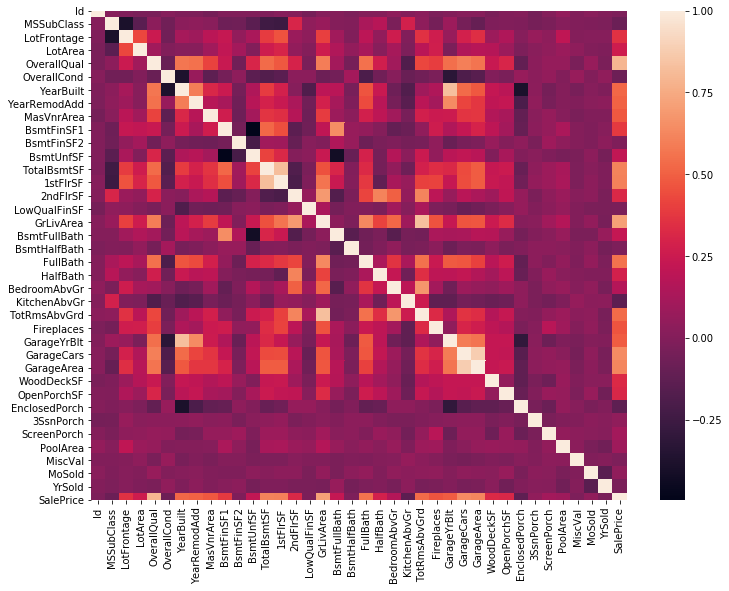

In [11]:
#Correlation Matrix
corrmat=df_train.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat)

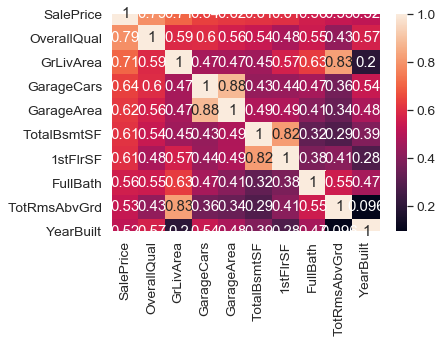

In [13]:
#Zoomed Heatmap Style
k=10 #number of variables for heatmap
cols=corrmat.nlargest(k,"SalePrice")["SalePrice"].index
cm=np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm=sns.heatmap(cm,annot=True,xticklabels=cols.values,yticklabels=cols.values)
plt.show()

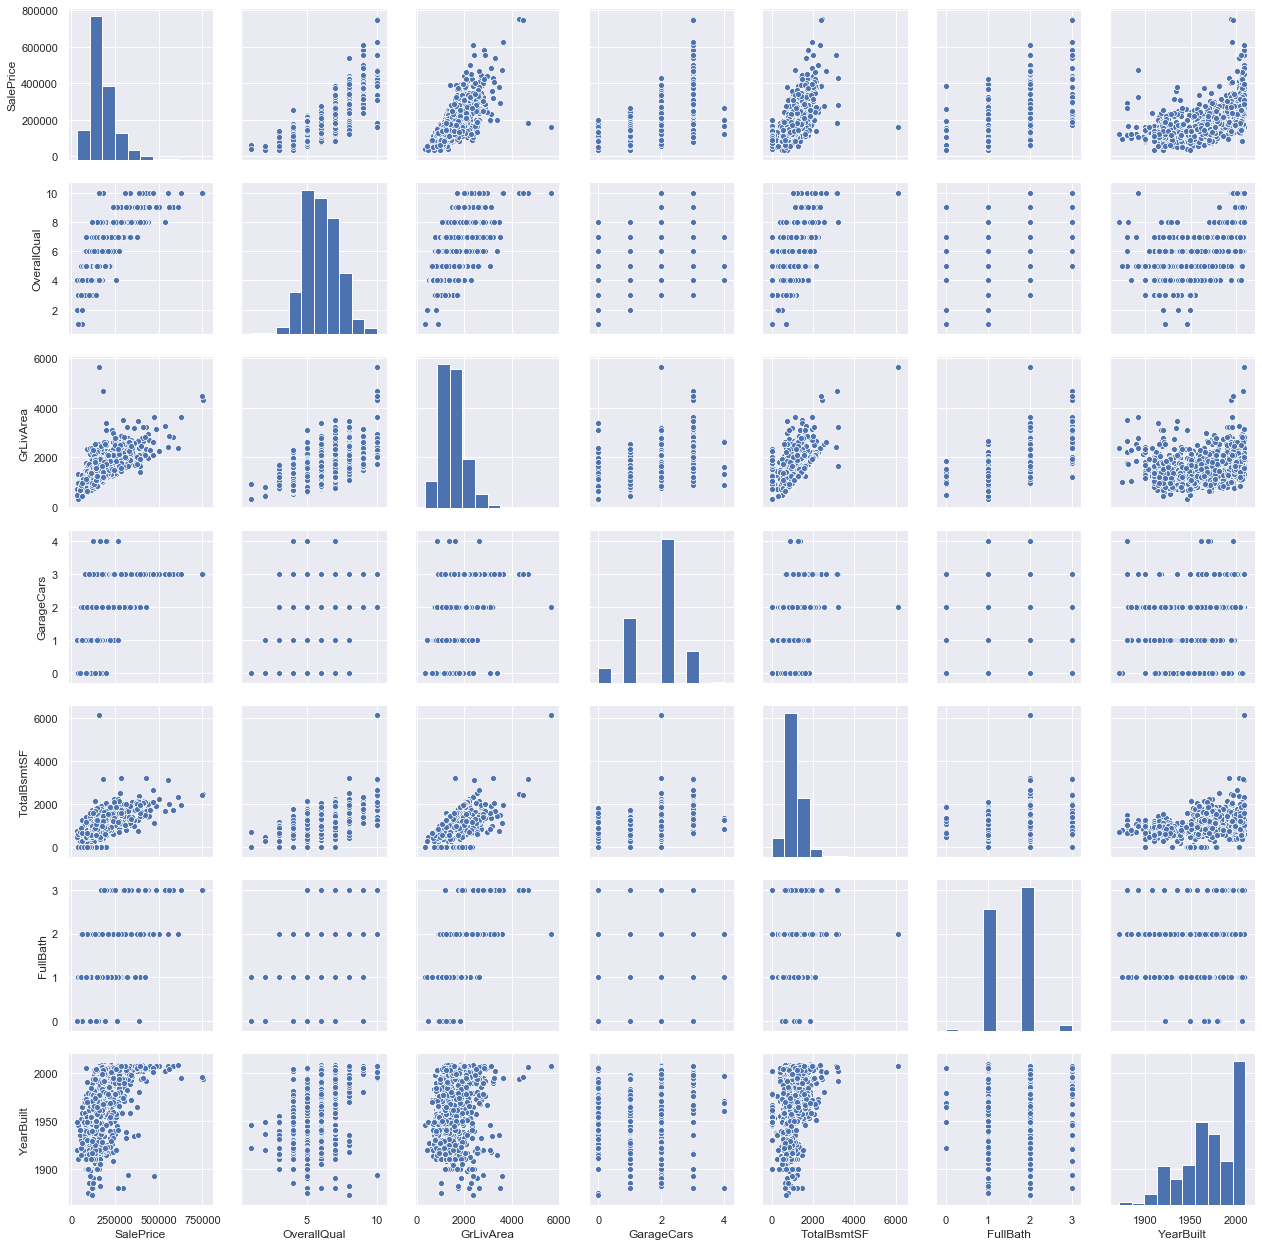

In [14]:
sns.set()
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols])
plt.show();

In [15]:
#Missing Data
total=df_train.isnull().sum().sort_values(ascending=False)
percent=(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
